<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Player-Performance" data-toc-modified-id="Player-Performance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Player Performance</a></span></li><li><span><a href="#Team" data-toc-modified-id="Team-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Team</a></span></li><li><span><a href="#Fixtures" data-toc-modified-id="Fixtures-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fixtures</a></span></li><li><span><a href="#Players" data-toc-modified-id="Players-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Players</a></span></li></ul></li><li><span><a href="#Feature-Development" data-toc-modified-id="Feature-Development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Development</a></span><ul class="toc-item"><li><span><a href="#Team" data-toc-modified-id="Team-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Team</a></span></li><li><span><a href="#Player-Position" data-toc-modified-id="Player-Position-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Player Position</a></span></li><li><span><a href="#Form" data-toc-modified-id="Form-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Form</a></span><ul class="toc-item"><li><span><a href="#Gaussian-Probability-Density-Function" data-toc-modified-id="Gaussian-Probability-Density-Function-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Gaussian Probability Density Function</a></span></li><li><span><a href="#Create-response-function" data-toc-modified-id="Create-response-function-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Create response function</a></span></li><li><span><a href="#Loop-thorugh-players-and-columns-of-interest" data-toc-modified-id="Loop-thorugh-players-and-columns-of-interest-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Loop thorugh players and columns of interest</a></span></li></ul></li><li><span><a href="#Played-Previous-Game" data-toc-modified-id="Played-Previous-Game-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Played Previous Game</a></span></li><li><span><a href="#Count-Player's-Games" data-toc-modified-id="Count-Player's-Games-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Count Player's Games</a></span></li><li><span><a href="#Value" data-toc-modified-id="Value-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Value</a></span></li><li><span><a href="#Team-Points-Form" data-toc-modified-id="Team-Points-Form-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Team Points Form</a></span></li></ul></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li></ul></div>

# Developing Features

This script will outline the different processing of developing different features.

## Import Packages

Self explanitory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

# Pandas Settings
pd.set_option('display.max_columns', None)

## Read Data

Read player performance, team, fixtures and player data.

### Player Performance

In [2]:
pp = pd.read_csv('../../data/csv/player_performance.csv')
pp = pp.sort_values(by=["id", "kickoff_time"])
pp.head()

,kickoff_time,team_h_score,team_a_score,was_home,round,total_points,value,transfers_balance,selected,transfers_in,transfers_out,loaned_in,loaned_out,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,ea_index,open_play_crosses,big_chances_created,clearances_blocks_interceptions,recoveries,key_passes,tackles,winning_goals,attempted_passes,completed_passes,penalties_conceded,big_chances_missed,errors_leading_to_goal,errors_leading_to_goal_attempt,tackled,offside,target_missed,fouls,dribbles,id,fixture,opponent_team
0,2018-08-12 15:00:00+00:00,0,2,True,1,3,50,0,70767,0,0,0,0,90,0,0,0,2,0,0,0,0,0,6,0,24,47.0,0.0,0.0,4.7,0,0,0,2,9,0,0,0,42,31,0,0,0,0,0,0,0,0,0,0,0,12
1,2018-08-18 16:30:00+00:00,3,2,False,2,3,50,188,90038,6059,5871,0,0,90,0,0,0,3,0,0,0,0,0,8,0,26,53.0,0.0,0.0,5.3,0,0,0,1,8,0,0,0,35,25,0,0,0,0,0,0,0,0,0,0,13,5
2,2018-08-25 14:00:00+00:00,3,1,True,3,3,50,8540,107301,19550,11010,0,0,90,0,0,0,1,0,0,0,0,0,4,0,17,27.8,0.0,0.0,2.8,0,0,0,0,10,0,0,0,24,20,0,0,0,0,0,0,0,0,0,0,20,18
3,2018-09-02 12:30:00+00:00,2,3,False,4,1,50,9582,123566,19332,9750,0,0,90,0,0,0,2,0,0,0,0,0,1,0,8,2.4,0.0,0.0,0.2,0,0,0,0,8,0,0,0,38,24,0,0,0,2,0,0,0,0,0,0,32,4
4,2018-09-15 14:00:00+00:00,1,2,False,5,2,50,-3297,123310,8837,12134,0,0,90,0,0,0,1,0,0,0,0,0,1,0,13,14.2,0.0,0.0,1.4,0,0,0,2,13,0,0,0,33,23,0,0,0,0,0,0,0,0,0,0,45,14


### Team

In [3]:
teams = pd.read_csv('../../data/csv/teams.csv')
teams.head()

,id,name,short_name,strength,strength_defence_home,strength_attack_home,strength_overall_home,strength_defence_away,strength_attack_away,strength_overall_away
0,0,Arsenal,ARS,4,1310,1240,1260,1340,1270,1320
1,1,Bournemouth,BOU,3,1120,1040,1030,1130,1100,1130
2,2,Brighton,BHA,2,1010,1040,1030,1070,1140,1050
3,3,Burnley,BUR,3,1000,990,1070,1040,1030,1100
4,4,Cardiff,CAR,2,1020,1030,1030,1090,1060,1080


### Fixtures

In [4]:
fixtures = pd.read_csv('../../data/csv/fixtures.csv')
fixtures.head()

,id,kickoff_time,team_h,team_a,team_h_score,team_a_score,team_h_difficulty,team_a_difficulty
0,0,2018-08-12T15:00:00Z,0,12,0,2,4,4
1,1,2018-08-11T14:00:00Z,1,4,2,0,2,3
2,2,2018-08-11T14:00:00Z,8,6,0,2,2,2
3,3,2018-08-11T14:00:00Z,9,5,0,3,4,2
4,4,2018-08-12T12:30:00Z,11,18,4,0,3,5


### Players

In [5]:
players = pd.read_csv('../../data/csv/players.csv')
players.head()

,id,first_name,second_name,display_name,position
0,0,Petr,Cech,Cech,0
1,1,Bernd,Leno,Leno,0
2,2,Laurent,Koscielny,Koscielny,1
3,3,Héctor,Bellerín,Bellerín,1
4,4,Nacho,Monreal,Monreal,1


## Feature Development

Each subsection calculates a different feature. Look under subheading for definitions.

Start by creating a blank DataFrame, and copying only a few key features. This will be the DataFrame that new features get added to.

In [6]:
dataset = pd.DataFrame()
columns_to_copy = ["was_home", "opponent_team", "total_points"]
dataset[columns_to_copy] = pp[columns_to_copy]
dataset.head()

,was_home,opponent_team,total_points
0,True,12,3
1,False,5,3
2,True,18,3
3,False,4,1
4,False,14,2


### Team

This will add the player's team id as a new column. This needs to be identified through the fixtures DataFrame rather than the players DataFrame.

In [7]:
# Empty array to store team data
team = np.zeros(len(pp), dtype="int")

# Loop thorugh player performances
for i in range(len(pp)):

    # extract id of fixture of interest
    current_fixture = pp.loc[i, "fixture"]

    # extract home team id if player was at home, extract away team id if player was away.
    if pp.loc[i, "was_home"]:
        team[i] = fixtures.loc[current_fixture, "team_h"]
    else:
        team[i] = fixtures.loc[current_fixture, "team_a"]

# Add to dataset
dataset["team"] = pd.Series(team)
dataset.head()

,was_home,opponent_team,total_points,team
0,True,12,3,0
1,False,5,3,0
2,True,18,3,0
3,False,4,1,0
4,False,14,2,0


### Player Position

This will add a column filled with values 0, 1, 2 and 3. Each describes a different position:
- 0 = Goalkeeper
- 1 = Defender
- 2 = Midfileder
- 3 = Forward

This will then be converted using One Hot Encoding.

In [8]:
# Add position category value
dataset["position"] = players.loc[np.array(pp["id"]), "position"].reset_index(
    drop=True)

In [9]:
# One Hot Encode
onehotencoder = sklearn.preprocessing.OneHotEncoder(sparse=False,
                                                    categories="auto")
position_ohe = onehotencoder.fit_transform(dataset["position"].values.reshape(
    len(pp), 1))
dataset[["GKP", "DEF", "MID", "FWD"]] = pd.DataFrame(position_ohe == 1)

In [10]:
# Drop position ordinal value
dataset = dataset.drop(columns=["position"])
dataset.head()

,was_home,opponent_team,total_points,team,GKP,DEF,MID,FWD
0,True,12,3,0,True,False,False,False
1,False,5,3,0,True,False,False,False
2,True,18,3,0,True,False,False,False
3,False,4,1,0,True,False,False,False
4,False,14,2,0,True,False,False,False


### Form

Calculates weighted average from previous games. More recent games have a higher weighting. This is performed using convolution between the column of interest and a response function which only takes into account previous games.
- total points
- minutes

#### Gaussian Probability Density Function

In [11]:
# normpdf function
import math
def normpdf(x, mu, sigma):
    if np.isinf(sigma):
        return np.ones(len(x), dtype="float")*(1/len(x))
    else:
        return (1/np.sqrt(2*math.pi*(sigma**2)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))

#### Create response function

Th number of games to consider can be directly defined and the relative weighting is defined using the standard deviation. Using a standard deviation of $\infty$ will give all games equal weightings. This will be used in a convolution.

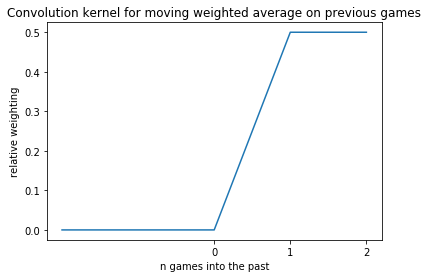

In [12]:
# Response Function for c
nPreviousGames = 2
sigma = np.inf
# sigma = infinty mean all games have an equal weighting

response = np.zeros((2*nPreviousGames)+1, dtype="float")
response[(nPreviousGames+1):] = normpdf(np.array(range(nPreviousGames)), 0, sigma)
response = response/np.sum(response)

plt.plot(response);
plt.ylabel('relative weighting');
plt.xlabel('n games into the past');
plt.xticks(np.array(range(nPreviousGames,(2*nPreviousGames)+1)), labels=list(range(nPreviousGames+1)));
plt.title('Convolution kernel for moving weighted average on previous games');

#### Loop thorugh players and columns of interest

In [13]:
# requires the convolve function from scipy package
# numpy has a convolve function also, but the output doesn't match the input size.
from scipy.signal import convolve

# calculate the form on these columns
form_on_columns = ["total_points", "minutes", "threat"]

# length of pp dataframe
pp_len = len(pp)

# unique player ids
player_ids = np.unique(pp["id"])

# pre-calculate player id boolean array
# each column is a player id, and the rows match those in pp
# a value of true means that row belongs to the player whose id is in the column.
player_bool = np.zeros((pp_len, len(player_ids)), dtype="bool")
for i in player_ids:
    player_bool[:, i] = pp["id"] == i
player_n_games = np.sum(player_bool, axis=0)

# loop thorugh columns
for i in form_on_columns:

    # nan array for
    overall_form = np.zeros(pp_len, dtype="float")
    home_form = np.zeros(pp_len, dtype="float")
    away_form = np.zeros(pp_len, dtype="float")

    # loop through players
    for j in player_ids:

        # overall form
        player_col = pp.loc[player_bool[:, j], ["was_home", i]]
        player_index = player_col.index
        player_values = player_col[i].values
        player_form = convolve(player_values, response, mode="same")
        overall_form[list(player_index)] = player_form
        
        # home form
        player_home_col = player_col.loc[player_col["was_home"],:]
        if len(player_home_col)>0:
            player_home_index = player_home_col.index
            player_home_values = player_home_col[i].values
            player_home_form = convolve(player_home_values, response, mode="same")
            home_form[list(player_home_index)] = player_home_form
        
        # away form
        player_away_col = player_col.loc[~player_col["was_home"],:]
        if len(player_away_col)>0:
            player_away_index = player_away_col.index
            player_away_values = player_away_col[i].values
            player_away_form = convolve(player_away_values, response, mode="same")
            away_form[list(player_away_index)] = player_away_form
   
    # add to dataset
    dataset[i + "_form"] = pd.Series(overall_form)
    dataset[i + "_home_form"] = pd.Series(home_form)
    dataset[i + "_away_form"] = pd.Series(away_form)
    dataset[i + "_relevant_form"] = pd.Series(home_form+away_form)

dataset.head(5)

,was_home,opponent_team,total_points,team,GKP,DEF,MID,FWD,total_points_form,total_points_home_form,total_points_away_form,total_points_relevant_form,minutes_form,minutes_home_form,minutes_away_form,minutes_relevant_form,threat_form,threat_home_form,threat_away_form,threat_relevant_form
0,True,12,3,0,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,5,3,0,True,False,False,False,1.5,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,18,3,0,True,False,False,False,3.0,1.5,0.0,1.5,90.0,45.0,0.0,45.0,0.0,0.0,0.0,0.0
3,False,4,1,0,True,False,False,False,3.0,0.0,1.5,1.5,90.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0
4,False,14,2,0,True,False,False,False,2.0,0.0,2.0,2.0,90.0,0.0,90.0,90.0,0.0,0.0,0.0,0.0


### Played Previous Game

This will return a boolean array which indicates if the player featured in the previous game.

In [14]:
def shiftBool(xs, n):
    if n >= 0:
        return np.concatenate((np.full(n, False), xs[:-n]))
    else:
        return np.concatenate((xs[-n:], np.full(-n, False)))

# empty boolean array
played_last_game = np.zeros(pp_len, dtype="bool")

# loop through players
for i in player_ids:
    
    player_col = pp.loc[player_bool[:, i], "minutes"]
    player_index = player_col.index
    player_values = player_col.values
    player_values_bool  = player_values>0
    player_values_shifted = shiftBool(player_values_bool,1)
    played_last_game[list(player_index)] = player_values_shifted
    
dataset["played_last_game"] = pd.Series(played_last_game)
dataset.head(10)

,was_home,opponent_team,total_points,team,GKP,DEF,MID,FWD,total_points_form,total_points_home_form,total_points_away_form,total_points_relevant_form,minutes_form,minutes_home_form,minutes_away_form,minutes_relevant_form,threat_form,threat_home_form,threat_away_form,threat_relevant_form,played_last_game
0,True,12,3,0,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,False,5,3,0,True,False,False,False,1.5,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,True,18,3,0,True,False,False,False,3.0,1.5,0.0,1.5,90.0,45.0,0.0,45.0,0.0,0.0,0.0,0.0,True
3,False,4,1,0,True,False,False,False,3.0,0.0,1.5,1.5,90.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0,True
4,False,14,2,0,True,False,False,False,2.0,0.0,2.0,2.0,90.0,0.0,90.0,90.0,0.0,0.0,0.0,0.0,True
5,True,7,11,0,True,False,False,False,1.5,3.0,0.0,3.0,90.0,90.0,0.0,90.0,0.0,0.0,0.0,0.0,True
6,True,17,1,0,True,False,False,False,6.5,7.0,0.0,7.0,90.0,90.0,0.0,90.0,0.0,0.0,0.0,0.0,True
7,False,8,0,0,True,False,False,False,6.0,0.0,1.5,1.5,67.5,0.0,90.0,90.0,0.0,0.0,0.0,0.0,True
8,True,10,0,0,True,False,False,False,0.5,6.0,0.0,6.0,22.5,67.5,0.0,67.5,0.0,0.0,0.0,0.0,False
9,False,6,0,0,True,False,False,False,0.0,0.0,1.0,1.0,0.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0,False


### Count Player's Games

This will keep a running tally of the number of games a player has been in the database.

In [15]:
# empty array
nGames = np.zeros(pp_len, dtype="int")

# loop thorugh players
for i in player_ids:
    
    player_col = pp.loc[player_bool[:, i], "was_home"]
    player_index = player_col.index
    nGames[list(player_index)] = np.array(range(len(player_index)))
    
dataset["n_games"] = pd.Series(nGames)
dataset.head()

,was_home,opponent_team,total_points,team,GKP,DEF,MID,FWD,total_points_form,total_points_home_form,total_points_away_form,total_points_relevant_form,minutes_form,minutes_home_form,minutes_away_form,minutes_relevant_form,threat_form,threat_home_form,threat_away_form,threat_relevant_form,played_last_game,n_games
0,True,12,3,0,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
1,False,5,3,0,True,False,False,False,1.5,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,1
2,True,18,3,0,True,False,False,False,3.0,1.5,0.0,1.5,90.0,45.0,0.0,45.0,0.0,0.0,0.0,0.0,True,2
3,False,4,1,0,True,False,False,False,3.0,0.0,1.5,1.5,90.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0,True,3
4,False,14,2,0,True,False,False,False,2.0,0.0,2.0,2.0,90.0,0.0,90.0,90.0,0.0,0.0,0.0,0.0,True,4


### Value

This will grab the value of the player from the previous week

In [16]:
def shiftFloat(xs, n):
    if n >= 0:
        return np.concatenate((np.full(n, 0), xs[:-n]))
    else:
        return np.concatenate((xs[-n:], np.full(-n, 0)))

# empty boolean array
prev_value = np.zeros(pp_len, dtype="float")
diff_value = np.zeros(pp_len, dtype="float")

# loop through players
for i in player_ids:
    
    player_col = pp.loc[player_bool[:, i], "value"]
    player_index = player_col.index
    player_values = player_col.values
    player_values_shifted = shiftFloat(player_values,1)
    prev_value[list(player_index)] = player_values_shifted
    diff_value[list(player_index)] = player_values_shifted-player_values[0]
    
    
dataset["prev_value"] = pd.Series(prev_value)
dataset["value_diff"] = pd.Series(diff_value)
dataset.head()

,was_home,opponent_team,total_points,team,GKP,DEF,MID,FWD,total_points_form,total_points_home_form,total_points_away_form,total_points_relevant_form,minutes_form,minutes_home_form,minutes_away_form,minutes_relevant_form,threat_form,threat_home_form,threat_away_form,threat_relevant_form,played_last_game,n_games,prev_value,value_diff
0,True,12,3,0,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0.0,-50.0
1,False,5,3,0,True,False,False,False,1.5,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,1,50.0,0.0
2,True,18,3,0,True,False,False,False,3.0,1.5,0.0,1.5,90.0,45.0,0.0,45.0,0.0,0.0,0.0,0.0,True,2,50.0,0.0
3,False,4,1,0,True,False,False,False,3.0,0.0,1.5,1.5,90.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0,True,3,50.0,0.0
4,False,14,2,0,True,False,False,False,2.0,0.0,2.0,2.0,90.0,0.0,90.0,90.0,0.0,0.0,0.0,0.0,True,4,50.0,0.0


### Team Points Form

This will calculate the number of points won by a team, and return the points from for each game week.

In [51]:
team_ids = np.array(range(20))
points_won_per_round = np.zeros((38,20), dtype="int")

for i in team_ids:
    
    # get id of teams
    team_index = np.logical_or(fixtures["team_h"]==i, fixtures["team_a"]==i)
    team_df = fixtures.loc[team_index,:].reset_index(drop=True)
    
    for j in team_df.index:
        if team_df.loc[j,"team_h"]==i:
            if team_df.loc[j,"team_h_score"] > team_df.loc[j,"team_a_score"]:
                points_won_per_round[j,i] = 3
            elif team_df.loc[j,"team_h_score"] < team_df.loc[j,"team_a_score"]:
                points_won_per_round[j,i] = 0
            else:
                points_won_per_round[j,i] = 1
        else:
            if team_df.loc[j,"team_h_score"] < team_df.loc[j,"team_a_score"]:
                points_won_per_round[j,i] = 3
            elif team_df.loc[j,"team_h_score"] > team_df.loc[j,"team_a_score"]:
                points_won_per_round[j,i] = 0
            else:
                points_won_per_round[j,i] = 1
    
points_tally = pd.DataFrame(points_won_per_round, columns=list(teams["short_name"]))
points_tally.head(38)
    

,ARS,BOU,BHA,BUR,CAR,CHE,CRY,EVE,FUL,HUD,LEI,LIV,MCI,MUN,NEW,SOU,TOT,WAT,WHU,WOL
0,0,3,0,1,0,3,3,1,0,0,0,3,3,3,0,1,3,3,0,1
1,0,3,3,0,1,3,0,3,0,0,3,3,3,0,1,0,3,3,0,0
2,3,1,0,0,1,3,0,1,3,1,3,3,1,0,0,0,3,3,0,1
3,3,0,1,0,0,3,0,1,1,1,0,3,3,3,0,3,0,3,0,3
4,3,3,1,0,0,3,3,0,0,0,0,3,3,3,0,1,0,0,3,3
5,3,0,0,3,0,1,1,0,1,0,3,3,3,1,1,0,3,1,1,1
6,3,3,0,3,0,1,0,3,0,0,3,1,3,0,0,0,3,0,3,3
7,3,3,3,1,0,3,0,3,0,1,0,1,1,3,0,0,3,0,0,3
8,3,1,3,0,3,1,0,3,0,0,0,3,3,1,0,1,3,3,0,0
9,1,3,3,0,0,3,1,0,0,0,1,3,3,3,1,1,0,3,1,0


## Random Forest Regressor

In [17]:
# separate labels and features
dataset_filter = dataset[dataset["n_games"]>=nPreviousGames]

In [24]:
# import models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# separated features and labels
#dataset_features = dataset_filter.drop(columns=["total_points", "n_games", "team", "opponent_team"])
dataset_features = dataset_filter[[
    "was_home", "GKP", "DEF", "MID", "FWD", "minutes_form", "prev_value",
    "total_points_form", "value_diff", "threat_form"
]]
dataset_labels = dataset_filter["total_points"]

# convert to array
features = dataset_features.values
labels = dataset_labels.values

# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)

# establish baseline
baseline_error = np.mean(np.abs(Y_train - np.mean(Y_train)))
print("average regressor - training mean absolute difference: " +
      str(baseline_error))

# train random forest
rf = RandomForestRegressor(n_estimators=2000, random_state=42, max_depth=7)
rf.fit(X_train, Y_train)

train_predictions = rf.predict(X_train)
rf_train_error = np.mean(np.abs(Y_train - train_predictions))
print("random forest regressor - training mean absolute difference: " +
      str(rf_train_error))

test_predictions = rf.predict(X_test)
rf_test_error = np.mean(np.abs(Y_test - test_predictions))
print("random forest regressor - test mean absolute difference: " +
      str(rf_test_error))

average regressor - training mean absolute difference: 1.7099694753760637
random forest regressor - training mean absolute difference: 1.2043030577061724
random forest regressor - test mean absolute difference: 1.2433753230217963


In [23]:
dataset_investigate = dataset_features.copy()
dataset_investigate["total_points"] = dataset["total_points"]
dataset_investigate["total_points_predictions"] = pd.Series(test_predictions)
dataset_investigate.head(15)

,was_home,GKP,DEF,MID,FWD,minutes_form,prev_value,total_points_form,value_diff,threat_form,total_points,total_points_predictions
2,True,True,False,False,False,90.0,50.0,3.0,0.0,0.0,3,2.945202
3,False,True,False,False,False,90.0,50.0,3.0,0.0,0.0,1,2.199476
4,False,True,False,False,False,90.0,50.0,2.0,0.0,0.0,2,2.886611
5,True,True,False,False,False,90.0,50.0,1.5,0.0,0.0,11,2.686859
6,True,True,False,False,False,90.0,50.0,6.5,0.0,0.0,1,0.180124
7,False,True,False,False,False,67.5,50.0,6.0,0.0,0.0,0,0.222212
8,True,True,False,False,False,22.5,50.0,0.5,0.0,0.0,0,0.685529
9,False,True,False,False,False,0.0,50.0,0.0,0.0,0.0,0,1.898597
10,True,True,False,False,False,0.0,50.0,0.0,0.0,0.0,0,0.097591
11,True,True,False,False,False,0.0,50.0,0.0,0.0,0.0,0,0.099335
